 Project: Customer Churn Prediction and Analysis

 Description: 

 This project aims to analyze customer data to predict churn 
 (whether a customer will leave or stay) using machine learning models.
 
 Dataset: Telco Customer Churn (IBM)


# 1-Importting libraries

In [305]:
!pip install plotly
!pip install nbformat



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


##autoreload imports 
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from src.utils.preprocessing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2-Load and Explore the Dataset

In [307]:
# Load dataset
Data = pd.read_csv(r"..\data\Raw-Telco-Customer-Churn.csv")

print("shape:", Data.shape)

# Display first 5 rows
print("sample of Data")
display(Data.head())

# Basic info
print("Dataset info:")
print(Data.info())

# Summary statics
print("Statical Summary:")
print(Data.describe())

shape: (7043, 21)
sample of Data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

# 3-Data Cleaning & Preprocessing

In [308]:
# check nulls
Data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [309]:
# check duplicates
Data.duplicated().sum()

0

In [310]:
# view the column names of the dataframe

col_names = Data.columns

col_names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Our target variable is the `Churn` column. So, I will check its distribution.

In [311]:
# check distribution of Churn column

Data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [312]:
# Some columns like 'TotalCharges' might be object type but numeric in nature
# Convert them to numeric
Data = convert_to_numeric(Data, "TotalCharges")

In [313]:
# Recheck missing values after conversion
print("\n Missing values after conversion:")
print(Data.isnull().sum())


 Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [314]:
# Fill missing TotalCharges values with median
Data = convert_to_numeric(Data, "TotalCharges", fill_method='median')

In [315]:
# Drop customerID column as it is not useful for analysis
Data = drop_column(Data, "customerID")


Replaced blank spaces with NaN and converted TotalCharges to numeric.

Filled missing values in TotalCharges with the median.

Dropped customerID since it doesn’t contribute to prediction.

# 4-Encoding

In [318]:
df_processed, label_encoders = encode_categorical_features(Data)


In [319]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

## Visualizing Outliers and detecting them

In [ ]:
cols = ["tenure", "MonthlyCharges", "TotalCharges"]
visualize_outliers_boxplot(df_processed, columns=cols)
visualize_outliers_hist(df_processed, columns=cols)

In [ ]:
cols_to_cap = ["tenure", "MonthlyCharges", "TotalCharges"]
df_clean, summary = cap_outliers_for_columns(df_processed, columns=cols_to_cap)


# 5-Feature Scaling

In [321]:
X_scaled, y, scaler = split_and_scale(df_processed, target_col="Churn")
print("Scaled Features Shape:", X_scaled.shape)
print("Target Shape:", y.shape)

Scaled Features Shape: (7043, 30)
Target Shape: (7043,)


Encoded all categorical columns using Label Encoding to make them numerical.

Scaled all numerical columns using StandardScaler to normalize their values and ensure all features are on a similar scale.

## Save the preprocessed data

In [ ]:
save_dataframe(df_clean, r"..\data\preprocessed_data.csv")

✅ Data saved to: ..\data\preprocessed_data.csv


# 7-Feature Importance

In [324]:
from src.utils.feature_importance import *

important_features, model = get_top_feature_importances(X_scaled, y, top_n=10)
print(important_features)


Top 10 Important Features:
TotalCharges                      0.198587
tenure                            0.175923
MonthlyCharges                    0.167846
InternetService_Fiber optic       0.039383
PaymentMethod_Electronic check    0.038892
gender                            0.028211
Contract_Two year                 0.026361
PaperlessBilling                  0.025463
OnlineSecurity_Yes                0.024631
TechSupport_Yes                   0.023627
dtype: float64
TotalCharges                      0.198587
tenure                            0.175923
MonthlyCharges                    0.167846
InternetService_Fiber optic       0.039383
PaymentMethod_Electronic check    0.038892
gender                            0.028211
Contract_Two year                 0.026361
PaperlessBilling                  0.025463
OnlineSecurity_Yes                0.024631
TechSupport_Yes                   0.023627
dtype: float64


# 8-Plotting the top 10 important features

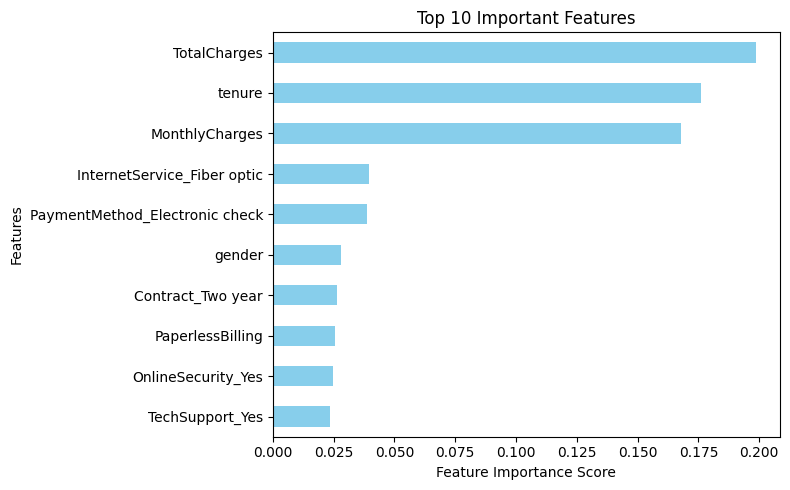

In [325]:
plot_feature_importances(important_features, title="Top 10 Important Features")

### Feature Importance using Random Forest

A Random Forest Classifier was used to identify the most important features that influence customer churn.

The model assigns an importance score to each feature based on how much it contributes to the prediction.

The top 10 most important features were visualized using a horizontal bar chart for better interpretation.


# The dataset is now clean, consistent, and fully numeric, ready for exploratory data analysis (EDA) and model development

# 6-Exploratory Data Analysis (EDA) & Visualizations

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

In [326]:
from src.utils.eda_visualization import *

In [327]:
plot_gender_churn_distribution(Data)

26.6 % of customers switched to another firm.

Customers are 49.5 % female and 50.5 % male

In [328]:


churn_map = {0: 'No', 1: 'Yes'}
contract_map={0:'Month-to-month',1:'One year',2:'Two year'}

plot_churn_vs_contract(Data, churn_col="Churn", contract_col="Contract")



About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [329]:
plot_payment_method_distribution(Data)


In [332]:
plot_churn_vs_category(
    Data,
    churn_col="Churn",
    category_col="PaymentMethod",
    title="<b>Customer Payment Method distribution w.r.t. Churn</b>"
)


Major customers who moved out were having Electronic Check as Payment Method.

Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
Data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [ ]:
Data['InternetService'].unique()
gender_map={0:'Female',1:'Male'}
InternetService_mape={0:'DSL',1:'Fiber optic',2:'No'}
Data[Data['gender']==1][["InternetService", "Churn"]].value_counts()




Series([], Name: count, dtype: int64)

In [ ]:
Data['InternetService'].unique()
gender_map={0:'Female',1:'Male'}
InternetService_mape={0:'DSL',1:'Fiber optic',2:'No'}
Data[Data['gender']==0][["InternetService", "Churn"]].value_counts()

Series([], Name: count, dtype: int64)

In [333]:
plot_churn_vs_category(
    Data,
    churn_col="Churn",
    category_col="InternetService",
    title="<b>Churn Distribution w.r.t. Internet Service</b>"
)

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.


In [334]:
plot_churn_vs_category(
    Data,
    churn_col="Churn",
    category_col="Dependents",
    title="<b>Churn Distribution w.r.t. Dependents</b>"
)

Customers without dependents are more likely to churn


In [335]:
plot_churn_vs_category(
    Data,
    churn_col="Churn",
    category_col="Partner",
    title="<b>Churn Distribution w.r.t. Partner</b>"
)

Customers that doesn't have partners are more likely to churn


In [336]:
PaperlessBilling_map = {0:'No',1:'Yes'}

plot_churn_vs_category(
    Data,
    churn_col="Churn",
    category_col="PaperlessBilling",
    title="<b>Churn Distribution w.r.t. Paperless Billing</b>"
)